In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_feather('D:/big-datasets/internship-telkom/eda-tiket-no-missing.ftr')
df

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2632496,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2632497,2021-02-18 09:56:08,0,Marah,Nganjuk,35,5,10M,Residensial,1,Lambat
2632498,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total
2632499,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat


In [3]:
def make_df_reg(reg):
    ramah_dict = {}
    marah_dict = {}

    for gangguan in df['gangguan_v2'].value_counts().head(6).index:
        ramah_perc = round(df['emosi'][(df['gangguan_v2'] == gangguan) & (df['reg'] == reg)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
        if ramah_perc not in ramah_dict:
            ramah_dict[gangguan] = ramah_perc

        marah_perc = round(df['emosi'][(df['gangguan_v2'] == gangguan) & (df['reg'] == reg)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
        if marah_perc not in marah_dict:
            marah_dict[gangguan] = marah_perc
            
    
    plot = pd.DataFrame(list(marah_dict.items()), columns = ['gangguan', 'marah_perc'])
    plot = plot.sort_values(by='marah_perc', ascending=True)
    plot['reg'] = reg
    
    return plot

In [4]:
start_time = time.time()

plot1 = make_df_reg(reg=1)
plot2 = make_df_reg(reg=2)
plot3 = make_df_reg(reg=3)
plot4 = make_df_reg(reg=4)
plot5 = make_df_reg(reg=5)
plot6 = make_df_reg(reg=6)
plot7 = make_df_reg(reg=7)

df_conc = pd.concat([plot1, plot2, plot3, plot4, plot5, plot6, plot7])

print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 22.29586362838745


In [5]:
df_conc = df_conc.reset_index(drop=True)

In [6]:
df_conc

,gangguan,marah_perc,reg
0,Gangguan Game Online,15.86,1
1,Tidak Bisa Koneksi,25.78,1
2,Tidak Bisa ke Website Tertentu,31.41,1
3,2P / 3P Mati Total,35.09,1
4,Intermitten / Putus-Putus,37.00,1
5,Lambat,39.45,1
6,Gangguan Game Online,18.89,2
7,Tidak Bisa Koneksi,29.83,2
8,Tidak Bisa ke Website Tertentu,36.16,2
9,2P / 3P Mati Total,38.26,2


In [7]:
ramah_dict = {}
marah_dict = {}

for gangguan in df['gangguan_v2'].value_counts().head(6).index:
    ramah_perc = round(df['emosi'][df['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    if ramah_perc not in ramah_dict:
        ramah_dict[gangguan] = ramah_perc
        
    marah_perc = round(df['emosi'][df['gangguan_v2'] == gangguan].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    if marah_perc not in marah_dict:
        marah_dict[gangguan] = marah_perc

In [8]:
plot_all = pd.DataFrame(list(marah_dict.items()), columns = ['gangguan', 'marah_perc'])
plot_all = plot_all.sort_values(by='marah_perc', ascending=True)

In [9]:
plot_all

,gangguan,marah_perc
4,Gangguan Game Online,14.75
0,Tidak Bisa Koneksi,27.26
5,Tidak Bisa ke Website Tertentu,34.30
1,2P / 3P Mati Total,36.60
3,Intermitten / Putus-Putus,40.50
2,Lambat,43.00


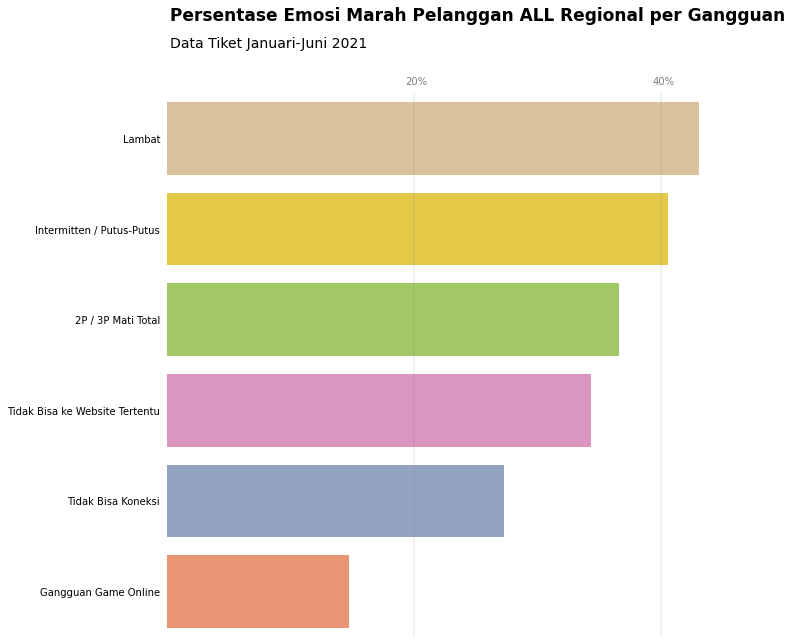

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.barplot(ax=ax, data=plot_all.sort_values('marah_perc', ascending=False),
            x='marah_perc', y='gangguan',
            orient='h', palette='Set2_r')

ax.xaxis.tick_top()
ax.set_xlabel('')
ax.set_ylabel('')
# ax.set_yticklabels(['Lambat', 'Intermitten / Putus-Putus', '2P / 3P Mati Total', 'Regional 3', 'Regional 4', 'Regional 5', 'Regional 6'])
ax.set_xticks([])
ax.text(x=19.3, y=-0.6, s='20%', alpha=0.5)
ax.text(x=39.3, y=-0.6, s='40%', alpha=0.5)
# ax.text(x=49.5, y=-0.6, s='50%', alpha=0.5)

ax.tick_params(axis='x', colors='grey')
ax.tick_params(top=False, left=False)

for loc in ['top', 'right', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)
    
ax.axvline(x=20, color='grey', alpha=0.15)
ax.axvline(x=40, color='grey', alpha=0.15)
# ax.axvline(x=50, color='grey', alpha=0.15)

ax.text(x=0.2, y=-1.3, s='Persentase Emosi Marah Pelanggan ALL Regional per Gangguan', weight='bold', size=17)
ax.text(x=0.2, y=-1, s='Data Tiket Januari-Juni 2021', size=14)

plt.show();

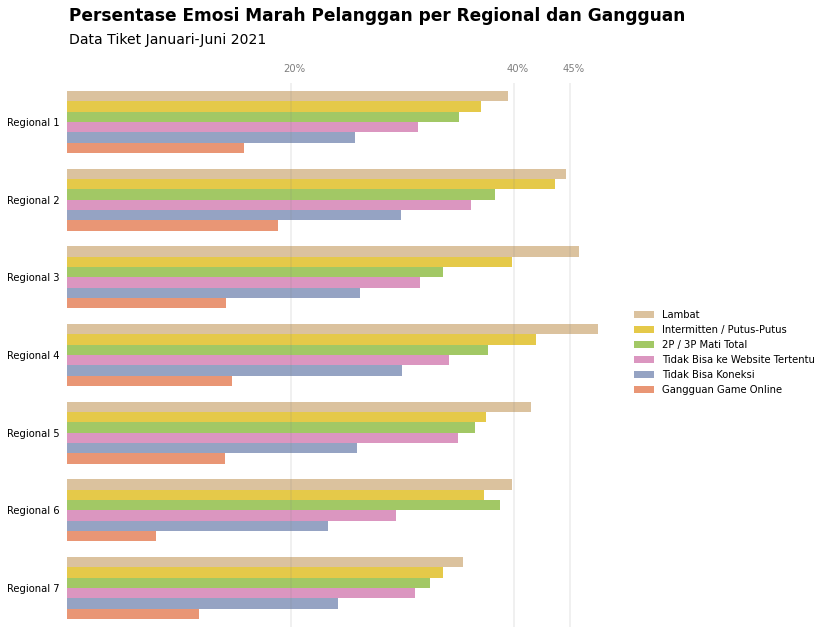

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.barplot(ax=ax, data=df_conc.sort_values('marah_perc', ascending=False),
            x='marah_perc', y='reg', hue='gangguan',
            orient='h', palette='Set2_r')

ax.xaxis.tick_top()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(['Regional 1', 'Regional 2', 'Regional 3', 'Regional 4', 'Regional 5', 'Regional 6', 'Regional 7'])
ax.set_xticks([])
ax.text(x=19.3, y=-0.65, s='20%', alpha=0.5)
ax.text(x=39.3, y=-0.65, s='40%', alpha=0.5)
ax.text(x=44.3, y=-0.65, s='45%', alpha=0.5)

ax.tick_params(axis='x', colors='grey')
ax.tick_params(top=False, left=False)

for loc in ['top', 'right', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)

ax.legend(frameon=False, bbox_to_anchor=(1, 0.6))
ax.axvline(x=20, color='grey', alpha=0.15)
ax.axvline(x=40, color='grey', alpha=0.15)
ax.axvline(x=45, color='grey', alpha=0.15)

ax.text(x=0.2, y=-1.3, s='Persentase Emosi Marah Pelanggan per Regional dan Gangguan', weight='bold', size=17)
ax.text(x=0.2, y=-1, s='Data Tiket Januari-Juni 2021', size=14)

plt.show();

# -----
## Checkpoint
# -----

In [12]:
df_conc

,gangguan,marah_perc,reg
0,Gangguan Game Online,15.86,1
1,Tidak Bisa Koneksi,25.78,1
2,Tidak Bisa ke Website Tertentu,31.41,1
3,2P / 3P Mati Total,35.09,1
4,Intermitten / Putus-Putus,37.00,1
5,Lambat,39.45,1
6,Gangguan Game Online,18.89,2
7,Tidak Bisa Koneksi,29.83,2
8,Tidak Bisa ke Website Tertentu,36.16,2
9,2P / 3P Mati Total,38.26,2


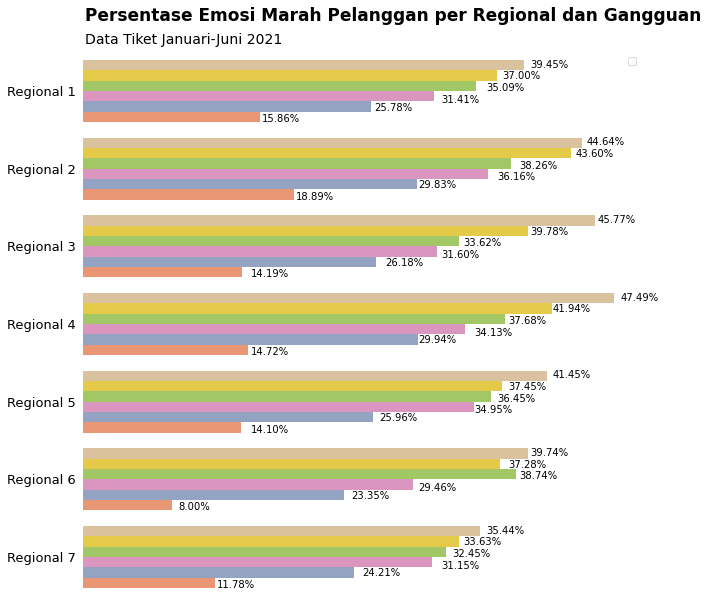

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.barplot(ax=ax, data=df_conc.sort_values('marah_perc', ascending=False),
            x='marah_perc', y='reg', hue='gangguan',
            orient='h', palette='Set2_r')

ax.xaxis.tick_top()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(['Regional 1', 'Regional 2', 'Regional 3', 'Regional 4', 'Regional 5', 'Regional 6', 'Regional 7'],
                   fontsize=13)
ax.set_xticks([])
# ax.text(x=19.3, y=-0.65, s='20%', alpha=0.5)
# ax.text(x=39.3, y=-0.65, s='40%', alpha=0.5)
# ax.text(x=44.3, y=-0.65, s='45%', alpha=0.5)

ax.tick_params(axis='x', colors='grey')
ax.tick_params(top=False, left=False)

for loc in ['top', 'right', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)

# ax.legend(frameon=False, bbox_to_anchor=(1.05, 0.6), fontsize='x-large')
ax.legend([])
# ax.axvline(x=20, color='grey', alpha=0.15)
# ax.axvline(x=40, color='grey', alpha=0.15)
# ax.axvline(x=45, color='grey', alpha=0.15)

ax.text(x=0.2, y=-0.9, s='Persentase Emosi Marah Pelanggan per Regional dan Gangguan', weight='bold', size=17)
ax.text(x=0.2, y=-0.6, s='Data Tiket Januari-Juni 2021', size=14)

# Annotate lambat
ax.text(x=40, y=-0.3, s='39.45%')
ax.text(x=45, y=0.7, s='44.64%')
ax.text(x=46, y=1.7, s='45.77%')
ax.text(x=48, y=2.7, s='47.49%')
ax.text(x=42, y=3.7, s='41.45%')
ax.text(x=40, y=4.7, s='39.74%')
ax.text(x=36, y=5.7, s='35.44%')

# Annotate Intermitten / Putus-Putus
ax.text(x=37.5, y=-0.15, s='37.00%')
ax.text(x=44, y=0.85, s='43.60%')
ax.text(x=40, y=1.85, s='39.78%')
ax.text(x=42, y=2.85, s='41.94%')
ax.text(x=38, y=3.85, s='37.45%')
ax.text(x=38, y=4.85, s='37.28%')
ax.text(x=34, y=5.85, s='33.63%')

# Annotate 2P / 3P Mati Total
ax.text(x=36, y=0, s='35.09%')
ax.text(x=39, y=1, s='38.26%')
ax.text(x=34, y=2, s='33.62%')
ax.text(x=38, y=3, s='37.68%')
ax.text(x=37, y=4, s='36.45%')
ax.text(x=39, y=5, s='38.74%')
ax.text(x=33, y=6, s='32.45%')

# Annotate Tidak Bisa ke Website Tertentu
ax.text(x=32, y=0.15, s='31.41%')
ax.text(x=37, y=1.15, s='36.16%')
ax.text(x=32, y=2.15, s='31.60%')
ax.text(x=35, y=3.15, s='34.13%')
ax.text(x=35, y=4.15, s='34.95%')
ax.text(x=30, y=5.15, s='29.46%')
ax.text(x=32, y=6.15, s='31.15%')

# Annotate Tidak Bisa Koneksi
ax.text(x=26, y=0.25, s='25.78%')
ax.text(x=30, y=1.25, s='29.83%')
ax.text(x=27, y=2.25, s='26.18%')
ax.text(x=30, y=3.25, s='29.94%')
ax.text(x=26.5, y=4.25, s='25.96%')
ax.text(x=24, y=5.25, s='23.35%')
ax.text(x=25, y=6.25, s='24.21%')

# Annotate Tidak Bisa Koneksi
ax.text(x=16, y=0.4, s='15.86%')
ax.text(x=19, y=1.4, s='18.89%')
ax.text(x=15, y=2.4, s='14.19%')
ax.text(x=15, y=3.4, s='14.72%')
ax.text(x=15, y=4.4, s='14.10%')
ax.text(x=8.5, y=5.4, s='8.00%')
ax.text(x=12, y=6.4, s='11.78%')

plt.show();

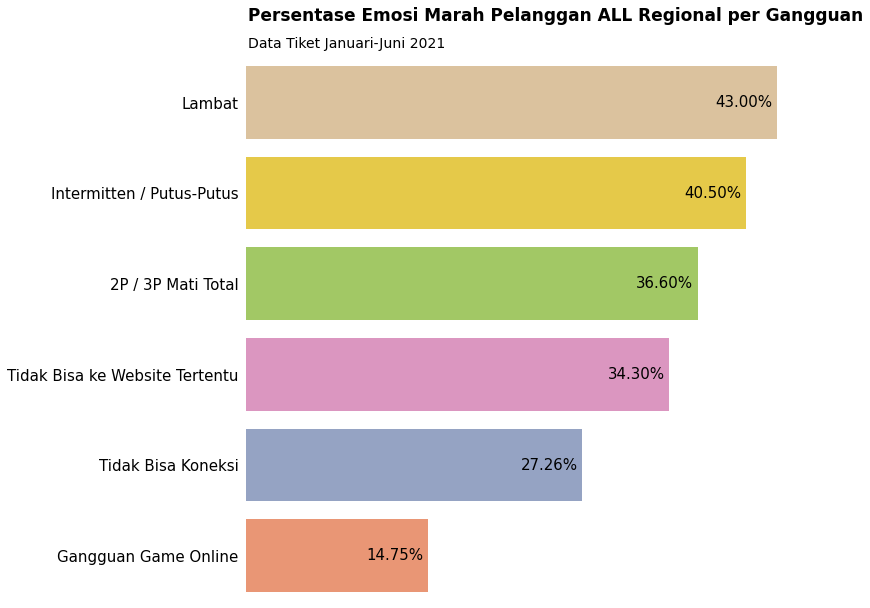

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.barplot(ax=ax, data=plot_all.sort_values('marah_perc', ascending=False),
            x='marah_perc', y='gangguan',
            orient='h', palette='Set2_r')

ax.xaxis.tick_top()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(['Lambat', 'Intermitten / Putus-Putus', '2P / 3P Mati Total', 'Tidak Bisa ke Website Tertentu', 'Tidak Bisa Koneksi', 'Gangguan Game Online'],
                   fontsize=15)
ax.set_xticks([])
# ax.text(x=19.3, y=-0.6, s='20%', alpha=0.5)
# ax.text(x=39.3, y=-0.6, s='40%', alpha=0.5)
# ax.text(x=49.5, y=-0.6, s='50%', alpha=0.5)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(top=False, left=False)

for loc in ['top', 'right', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)
    
# ax.axvline(x=20, color='grey', alpha=0.15)
# ax.axvline(x=40, color='grey', alpha=0.15)
# ax.axvline(x=50, color='grey', alpha=0.15)

ax.text(x=0.2, y=-0.9, s='Persentase Emosi Marah Pelanggan ALL Regional per Gangguan', weight='bold', size=17)
ax.text(x=0.2, y=-0.6, s='Data Tiket Januari-Juni 2021', size=14)

# Annotate
ax.text(x=38, y=0.05, s='43.00%', size=15)
ax.text(x=35.5, y=1.05, s='40.50%', size=15)
ax.text(x=31.6, y=2.05, s='36.60%', size=15)
ax.text(x=29.30, y=3.05, s='34.30%', size=15)
ax.text(x=22.26, y=4.05, s='27.26%', size=15)
ax.text(x=9.75, y=5.05, s='14.75%', size=15)

plt.show();

In [15]:
plot_all

,gangguan,marah_perc
4,Gangguan Game Online,14.75
0,Tidak Bisa Koneksi,27.26
5,Tidak Bisa ke Website Tertentu,34.30
1,2P / 3P Mati Total,36.60
3,Intermitten / Putus-Putus,40.50
2,Lambat,43.00


# -----
## Checkpoint
# -----

In [16]:
df

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2632496,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2632497,2021-02-18 09:56:08,0,Marah,Nganjuk,35,5,10M,Residensial,1,Lambat
2632498,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total
2632499,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat


In [17]:
df['gangguan_v2'].value_counts().head(6)

Tidak Bisa Koneksi                955207
2P / 3P Mati Total                765241
Lambat                            695984
Intermitten / Putus-Putus         177397
Gangguan Game Online               16958
Tidak Bisa ke Website Tertentu     16608
Name: gangguan_v2, dtype: int64

In [18]:
df['gangguan_v2'][df['gangguan_v2'] == 'Lambat'].count()

695984

In [19]:
df_ts = df.copy()

In [20]:
df_ts

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2632496,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2632497,2021-02-18 09:56:08,0,Marah,Nganjuk,35,5,10M,Residensial,1,Lambat
2632498,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total
2632499,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat


In [21]:
df_ts = df_ts[['reportdate', 'gangguan_v2']]

In [22]:
# df_ts = df_ts.set_index('reportdate')

In [23]:
# df_ts['gangguan_v2'].plot()

<AxesSubplot:xlabel='gangguan_v2'>

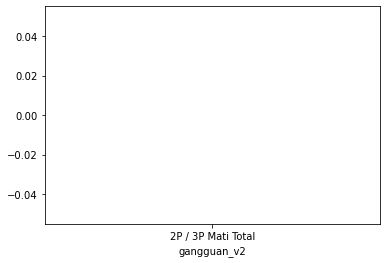

In [24]:
sns.lineplot(data=df_ts[:10], x='gangguan_v2')

In [25]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632501 entries, 0 to 2632500
Data columns (total 2 columns):
 #   Column       Dtype         
---  ------       -----         
 0   reportdate   datetime64[ns]
 1   gangguan_v2  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 40.2+ MB


In [26]:
df_ts['gangguan_v2'][(df_ts['gangguan_v2'] == 'Lambat') & (df_ts['reportdate'].dt.month == 1)].count()

132891

In [27]:
df_ts['gangguan_v2'][(df_ts['gangguan_v2'] == 'Lambat') & (df_ts['reportdate'].dt.month == 2)].count()

110862

In [28]:
df_ts['gangguan_v2'][(df_ts['gangguan_v2'] == 'Lambat') & (df_ts['reportdate'].dt.month == 3)].count()

115885

In [29]:
df_ts['gangguan_v2'][(df_ts['gangguan_v2'] == 'Lambat') & (df_ts['reportdate'].dt.month == 4)].count()

116780

In [30]:
df_ts['gangguan_v2'][(df_ts['gangguan_v2'] == 'Lambat') & (df_ts['reportdate'].dt.month == 5)].count()

100338

In [31]:
df_ts['gangguan_v2'][(df_ts['gangguan_v2'] == 'Lambat') & (df_ts['reportdate'].dt.month == 6)].count()

119228

In [32]:
df_ts['gangguan_v2'][df_ts['reportdate'].dt.month == 1].count()

464324

In [33]:
132891 / 464324

0.286203168477184

In [34]:
d = pd.DataFrame(columns=['bln', 'gangguan', 'perc'])

In [35]:
d.loc[0] = ['januari', 'lambat', 28]

In [36]:
d

,bln,gangguan,perc
0,januari,lambat,28


In [37]:
bln_dict = {}

gangguan_lst = ['Lambat', 'Intermitten / Putus-Putus', '2P / 3P Mati Total', 'Tidak Bisa ke Website Tertentu', 'Tidak Bisa Koneksi', 'Gangguan Game Online']
for gangguan in gangguan_lst:
    count = df_ts['gangguan_v2'][(df_ts['gangguan_v2'] == gangguan) & (df_ts['reportdate'].dt.month == 1)].count()
    total_count = df_ts['gangguan_v2'][df_ts['reportdate'].dt.month == 1].count()
    perc = round((count / total_count) * 100, 2)
    if perc not in bln_dict:
        bln_dict[gangguan] = perc

In [38]:
bln_dict

{'Lambat': 28.62,
 'Intermitten / Putus-Putus': 5.89,
 '2P / 3P Mati Total': 27.63,
 'Tidak Bisa ke Website Tertentu': 0.8,
 'Tidak Bisa Koneksi': 36.08,
 'Gangguan Game Online': 0.77}

In [39]:
df_ts['reportdate'].dt.month.value_counts()

3    467191
1    464324
4    461495
6    438139
2    409479
5    391873
Name: reportdate, dtype: int64

In [40]:
bln2_dict = {}

gangguan_lst = ['Lambat', 'Intermitten / Putus-Putus', '2P / 3P Mati Total', 'Tidak Bisa ke Website Tertentu', 'Tidak Bisa Koneksi', 'Gangguan Game Online']
for gangguan in gangguan_lst:
    count = df_ts['gangguan_v2'][(df_ts['gangguan_v2'] == gangguan) & (df_ts['reportdate'].dt.month == 2)].count()
    total_count = df_ts['gangguan_v2'][df_ts['reportdate'].dt.month == 2].count()
    perc = round((count / total_count) * 100, 2)
    if perc not in bln2_dict:
        bln2_dict[gangguan] = perc

In [41]:
bln2_dict

{'Lambat': 27.07,
 'Intermitten / Putus-Putus': 6.31,
 '2P / 3P Mati Total': 28.43,
 'Tidak Bisa ke Website Tertentu': 0.64,
 'Tidak Bisa Koneksi': 36.38,
 'Gangguan Game Online': 0.94}

In [42]:
plot1 = pd.DataFrame(list(bln_dict.items()), columns = ['gangguan', 'count_perc'])
# plot1 = plot1.sort_values(by='marah_perc', ascending=True)

In [43]:
plot1['bln'] = 1

In [44]:
plot1

,gangguan,count_perc,bln
0,Lambat,28.62,1
1,Intermitten / Putus-Putus,5.89,1
2,2P / 3P Mati Total,27.63,1
3,Tidak Bisa ke Website Tertentu,0.80,1
4,Tidak Bisa Koneksi,36.08,1
5,Gangguan Game Online,0.77,1


In [45]:
plot2 = pd.DataFrame(list(bln2_dict.items()), columns = ['gangguan', 'count_perc'])

In [46]:
plot2['bln'] = 2

In [47]:
plot2

,gangguan,count_perc,bln
0,Lambat,27.07,2
1,Intermitten / Putus-Putus,6.31,2
2,2P / 3P Mati Total,28.43,2
3,Tidak Bisa ke Website Tertentu,0.64,2
4,Tidak Bisa Koneksi,36.38,2
5,Gangguan Game Online,0.94,2


In [48]:
df_conc2 = pd.concat([plot1, plot2])

In [49]:
df_conc2

,gangguan,count_perc,bln
0,Lambat,28.62,1
1,Intermitten / Putus-Putus,5.89,1
2,2P / 3P Mati Total,27.63,1
3,Tidak Bisa ke Website Tertentu,0.80,1
4,Tidak Bisa Koneksi,36.08,1
5,Gangguan Game Online,0.77,1
0,Lambat,27.07,2
1,Intermitten / Putus-Putus,6.31,2
2,2P / 3P Mati Total,28.43,2
3,Tidak Bisa ke Website Tertentu,0.64,2


<AxesSubplot:xlabel='count_perc', ylabel='bln'>

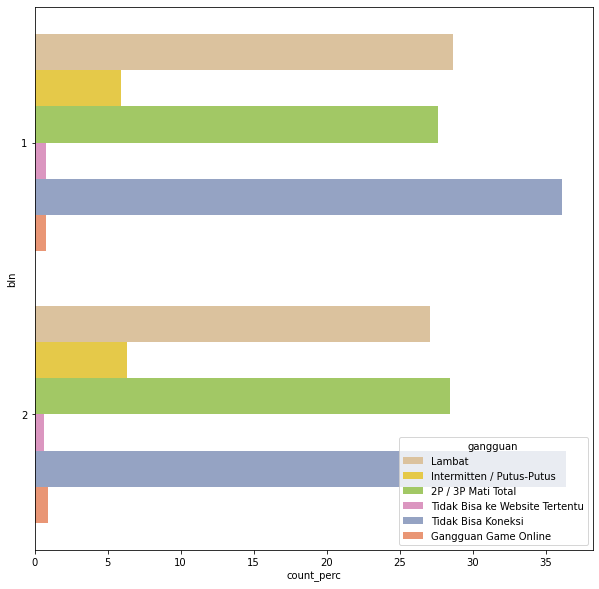

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.barplot(ax=ax, data=df_conc2,
            x='count_perc', y='bln', hue='gangguan',
            orient='h', palette='Set2_r')

<AxesSubplot:xlabel='bln', ylabel='count_perc'>

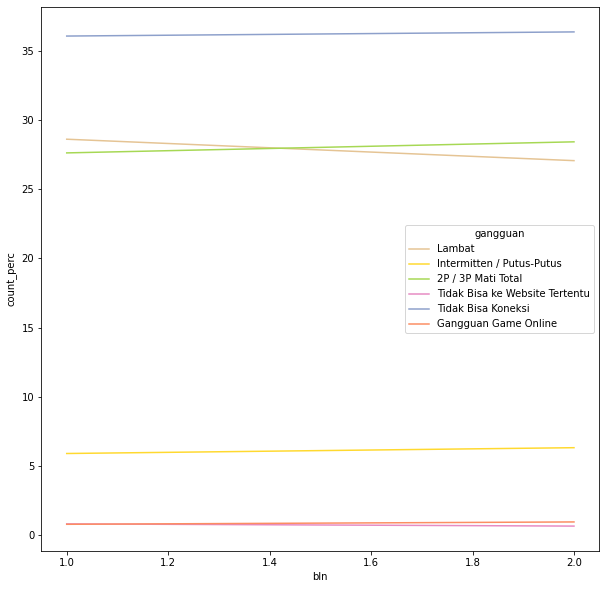

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.lineplot(ax=ax, data=df_conc2, x='bln', y='count_perc', hue='gangguan', palette='Set2_r')

# -----
# Checkpoint
# -----

In [52]:
df_conc

,gangguan,marah_perc,reg
0,Gangguan Game Online,15.86,1
1,Tidak Bisa Koneksi,25.78,1
2,Tidak Bisa ke Website Tertentu,31.41,1
3,2P / 3P Mati Total,35.09,1
4,Intermitten / Putus-Putus,37.00,1
5,Lambat,39.45,1
6,Gangguan Game Online,18.89,2
7,Tidak Bisa Koneksi,29.83,2
8,Tidak Bisa ke Website Tertentu,36.16,2
9,2P / 3P Mati Total,38.26,2


In [53]:
df_copy = df_conc.copy()

In [54]:
df_conc['ramah_perc'] = df_conc['marah_perc'].apply(lambda x:100-x)

In [55]:
df_conc

,gangguan,marah_perc,reg,ramah_perc
0,Gangguan Game Online,15.86,1,84.14
1,Tidak Bisa Koneksi,25.78,1,74.22
2,Tidak Bisa ke Website Tertentu,31.41,1,68.59
3,2P / 3P Mati Total,35.09,1,64.91
4,Intermitten / Putus-Putus,37.00,1,63.00
5,Lambat,39.45,1,60.55
6,Gangguan Game Online,18.89,2,81.11
7,Tidak Bisa Koneksi,29.83,2,70.17
8,Tidak Bisa ke Website Tertentu,36.16,2,63.84
9,2P / 3P Mati Total,38.26,2,61.74


In [56]:
df1 = df_conc[:6]
df1 = df1.drop('reg', axis=1)

In [57]:
df1

,gangguan,marah_perc,ramah_perc
0,Gangguan Game Online,15.86,84.14
1,Tidak Bisa Koneksi,25.78,74.22
2,Tidak Bisa ke Website Tertentu,31.41,68.59
3,2P / 3P Mati Total,35.09,64.91
4,Intermitten / Putus-Putus,37.00,63.00
5,Lambat,39.45,60.55


<AxesSubplot:title={'center':'Stacked Bar Graph'}, ylabel='gangguan'>

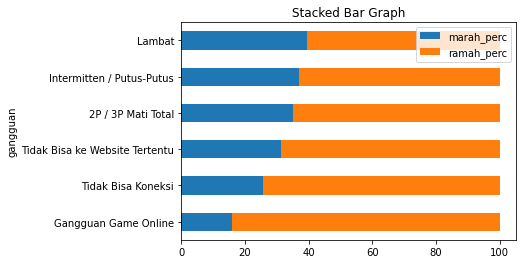

In [58]:
df1.plot(x ='gangguan', kind ='barh', stacked=True, title='Stacked Bar Graph', mark_right=True)

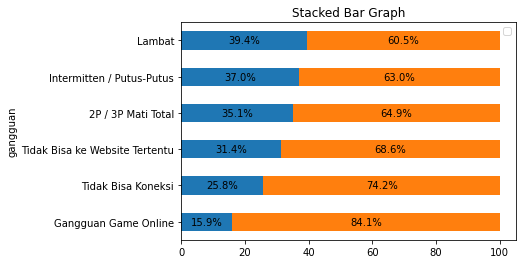

In [59]:
df1.plot(x ='gangguan', kind ='barh', stacked=True, title='Stacked Bar Graph', mark_right=True)

df_total = df1["marah_perc"] + df1["ramah_perc"]
df_rel = df1[df1.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df1.iloc[:, 1:].cumsum(1)[n], 
                                         df1[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')
plt.legend([])
plt.show();

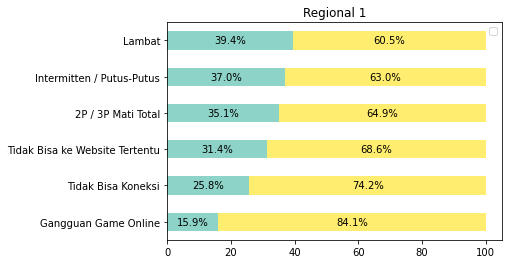

In [93]:
df1.plot(x ='gangguan', kind ='barh', stacked=True, title='Regional 1', mark_right=True, cmap='Set3')

df_total = df1["marah_perc"] + df1["ramah_perc"]
df_rel = df1[df1.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df1.iloc[:, 1:].cumsum(1)[n], 
                                         df1[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

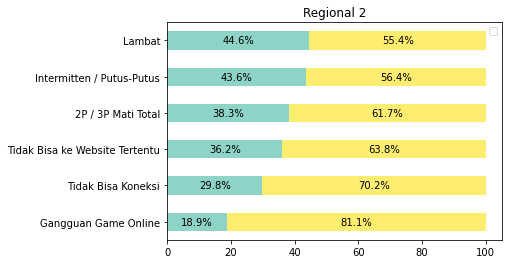

In [94]:
df2 = df_conc[df_conc['reg'] == 2]
df2 = df2.drop('reg', axis=1)

df2.plot(x ='gangguan', kind ='barh', stacked=True, title='Regional 2', mark_right=True, cmap='Set3')

df_total = df2["marah_perc"] + df2["ramah_perc"]
df_rel = df2[df2.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df2.iloc[:, 1:].cumsum(1)[n], 
                                         df2[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

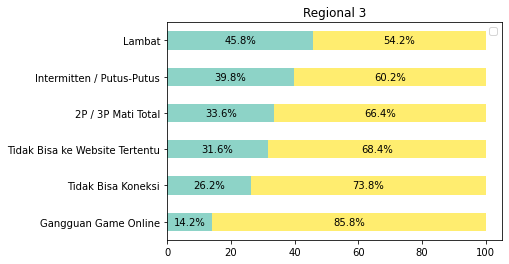

In [95]:
df3 = df_conc[df_conc['reg'] == 3]
df3 = df3.drop('reg', axis=1)

df3.plot(x ='gangguan', kind ='barh', stacked=True, title='Regional 3', mark_right=True, cmap='Set3')

df_total = df3["marah_perc"] + df3["ramah_perc"]
df_rel = df3[df3.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df3.iloc[:, 1:].cumsum(1)[n], 
                                         df3[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

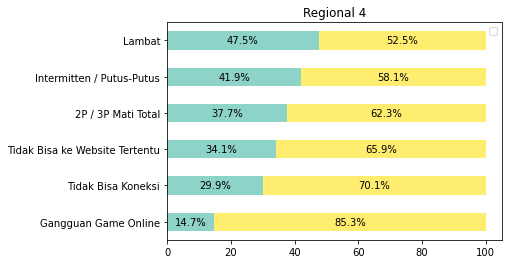

In [96]:
df4 = df_conc[df_conc['reg'] == 4]
df4 = df4.drop('reg', axis=1)

df4.plot(x ='gangguan', kind ='barh', stacked=True, title='Regional 4', mark_right=True, cmap='Set3')

df_total = df4["marah_perc"] + df4["ramah_perc"]
df_rel = df4[df4.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df4.iloc[:, 1:].cumsum(1)[n], 
                                         df4[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

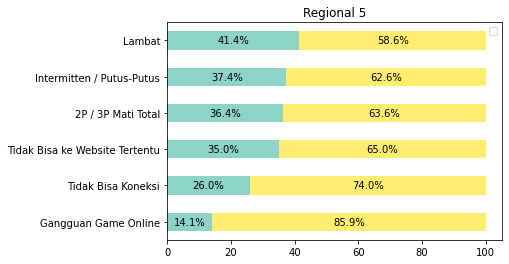

In [97]:
df5 = df_conc[df_conc['reg'] == 5]
df5 = df5.drop('reg', axis=1)

df5.plot(x ='gangguan', kind ='barh', stacked=True, title='Regional 5', mark_right=True, cmap='Set3')

df_total = df5["marah_perc"] + df5["ramah_perc"]
df_rel = df5[df5.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df5.iloc[:, 1:].cumsum(1)[n], 
                                         df5[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

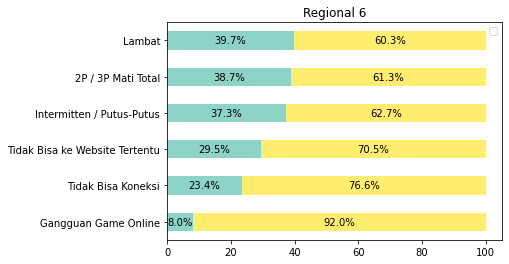

In [98]:
df6 = df_conc[df_conc['reg'] == 6]
df6 = df6.drop('reg', axis=1)

df6.plot(x ='gangguan', kind ='barh', stacked=True, title='Regional 6', mark_right=True, cmap='Set3')

df_total = df6["marah_perc"] + df6["ramah_perc"]
df_rel = df6[df6.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df6.iloc[:, 1:].cumsum(1)[n], 
                                         df6[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

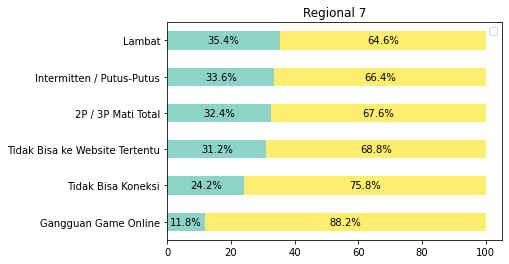

In [99]:
df7 = df_conc[df_conc['reg'] == 7]
df7 = df7.drop('reg', axis=1)

df7.plot(x ='gangguan', kind ='barh', stacked=True, title='Regional 7', mark_right=True, cmap='Set3')

df_total = df7["marah_perc"] + df7["ramah_perc"]
df_rel = df7[df7.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df7.iloc[:, 1:].cumsum(1)[n], 
                                         df7[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

In [67]:
df_conc

,gangguan,marah_perc,reg,ramah_perc
0,Gangguan Game Online,15.86,1,84.14
1,Tidak Bisa Koneksi,25.78,1,74.22
2,Tidak Bisa ke Website Tertentu,31.41,1,68.59
3,2P / 3P Mati Total,35.09,1,64.91
4,Intermitten / Putus-Putus,37.00,1,63.00
5,Lambat,39.45,1,60.55
6,Gangguan Game Online,18.89,2,81.11
7,Tidak Bisa Koneksi,29.83,2,70.17
8,Tidak Bisa ke Website Tertentu,36.16,2,63.84
9,2P / 3P Mati Total,38.26,2,61.74


In [68]:
plot_all

,gangguan,marah_perc
4,Gangguan Game Online,14.75
0,Tidak Bisa Koneksi,27.26
5,Tidak Bisa ke Website Tertentu,34.30
1,2P / 3P Mati Total,36.60
3,Intermitten / Putus-Putus,40.50
2,Lambat,43.00


In [69]:
plot_all['ramah_perc'] = plot_all['marah_perc'].apply(lambda x:100-x)

In [70]:
plot_all

,gangguan,marah_perc,ramah_perc
4,Gangguan Game Online,14.75,85.25
0,Tidak Bisa Koneksi,27.26,72.74
5,Tidak Bisa ke Website Tertentu,34.30,65.70
1,2P / 3P Mati Total,36.60,63.40
3,Intermitten / Putus-Putus,40.50,59.50
2,Lambat,43.00,57.00


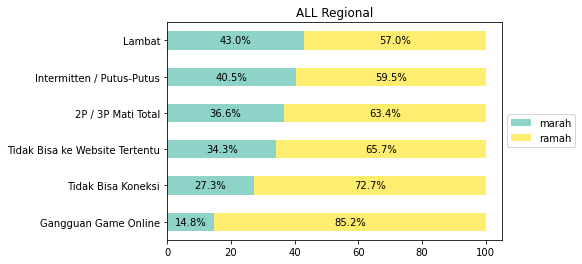

In [92]:
plot_all.plot(x ='gangguan', kind ='barh', stacked=True, title='ALL Regional', mark_right=True, cmap='Set3')

df_total = plot_all["marah_perc"] + plot_all["ramah_perc"]
df_rel = plot_all[plot_all.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(plot_all.iloc[:, 1:].cumsum(1)[n], 
                                         plot_all[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend(['marah', 'ramah'], bbox_to_anchor=(1, 0.6))
plt.ylabel('')


plt.show();